# Burocracy
1. checking GPU
2. install dependencies
3. import libraries

In [ ]:
##1. setting gpu
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
## 2. installation
!apt-get install x11-utils > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
## 3. libraries

#standard python
import gym
import numpy as np
import random
from matplotlib import pyplot
import matplotlib.pyplot as plt
#display plot in a notebook
%matplotlib inline
#plot style, just choises
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D #3D plot
from collections import defaultdict
from functools import partial

#graphic render of the environment
from IPython import display as ipythondisplay

# Setting up the environment
Looking at the environment and decide the values to start with

In [ ]:
env = gym.make('FrozenLake-v1')
env.reset()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


0

In [ ]:
ALPHA = 0.4
GAMMA = 0.999
EPSILON = 0.05

# Actual code
Trying to learn how to do a TD+Q algorithm

## Initialize Q table
Q table is 0 for each (state, action) pair

In [ ]:
q = {} #store q values for each state and action
for state in range(env.observation_space.n):
  for action in range(env.action_space.n):
    q[(state, action)] = 0.0


## Update Q table
updating Q table value according to the TD+Q rule

In [ ]:
## function updating Q according to TD+Q algorithm
def update_q_table(prev_state, action, reward, next_state, alpha = ALPHA, gamma = GAMMA):
  for a in range(env.action_space.n):
    #maximum of Q function over all the actions in the next state
    max_q_next = max([q[(next_state, a)]])
    # update according to TD rule
    q[(prev_state, action)] += alpha*(reward+gamma*max_q_next-q[(prev_state, action)])


## Define the policy
choose a greedy policy. Remember it updates itself cause you update the Q maximum over the actions.

In [ ]:
def epsilon_greedy_policy(state, epsilon = EPSILON):
  if random.uniform(0,1) < epsilon:
    return env.action_space.sample()
  else:
    return max(list(range(env.action_space.n)), key = lambda x: q[(state, x)])


NOTE: Don't get the sintax above, so I translate here.

**lambda function**: Use this function if u need to find the maximum of a dictionary. The function returns the values of dictionaries. Based on the values (rather than the dictionary's keys), the key having the maximum value is returned.

So *key = lambda x*, means: find the maximum of this dictionary, only over the index x. Here we take the maximum over the actions, because the state is fixed as a parameter of this function.

**list(range(env.action_space.n))**: object of which to fnd the maximum.

Putting everything together, this means: create the object of the form above, a list of env.action_space.n elements and then fill it with q(fixed_state, action), so one place for each actions. Then find the maximum over it, and return the index, which is basically the action.



## Let's see the result

In [ ]:

for i in range(10000000):
  r = 0 #initialize the rewards list
  prev_state = env.reset()
  while True:
    #rendering the situation on screen
     '''
     screen = env.render(mode='rgb_array')
     plt.imshow(screen)
     ipythondisplay.clear_output(wait=True)
     ipythondisplay.display(plt.gcf())
     '''

     #move the elph according to the policy
     action_elph = epsilon_greedy_policy(prev_state)
     next_state_elph, reward_elph, done, _ = env.step(action_elph)

     '''
      #rendering the situation on screen
     screen = env.render(mode='rgb_array')
     plt.imshow(screen)
     ipythondisplay.clear_output(wait=True)
     ipythondisplay.display(plt.gcf())
     '''

     #update Q table
     update_q_table(prev_state, action_elph, reward_elph,\
                    next_state_elph)

     #update state
     prev_state = next_state_elph

     #store all the rewards obtained
     r += reward_elph

     # go out of while if the episode is over
     if done:
      break
  print("total reward : ", r)
env.close()

Streaming output truncated to the last 5000 lines.
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total reward :  0.0
total rew

KeyboardInterrupt: ignored

# Check if the elph actually learnt something or not

In [ ]:
#for each state extract the maximum
best_actions  = []
for state in range(0,env.observation_space.n):
  best_actions.append(max(list(range(env.action_space.n)), key = lambda x: q[(14, x)]))



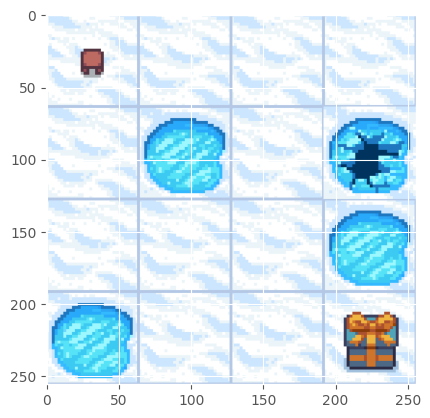

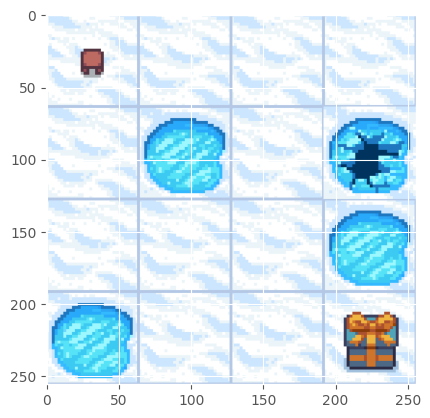

In [ ]:
env.reset()
for i in range(0, len(best_actions)):
  print(i)
  print(best_actions[i])
#rendering the situation on screen
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  action = best_actions[i]
  observation, reward, done,_ = env.step(action)

  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())
  if done:
    break
    print('schiantato')

env.close()